# In-Class 7: Interference and Diffraction

For the last few weeks we've discussed interference and diffraction, and how the continuous interference from a single-slit compares to discrete interferences from multiple very narrow slits. We've learned a lot of math to explain how these things work.

Today's in-class will focus on simulating these effects, and demonstrate how simulation can drastically simplify the need for complex math to explain these scenarios. With just simple wave definitions, you should be able to reproduce all the effects we saw in class.

We'll also explore different ways of representing data. So we've mostly visualized waves traveling in one dimension -- today we'll have to look at waves traveling in two dimensions. That means we need to visualize the position of the waves in 2D space, and the magnitude of the electric field in a third dimension. We can do this with 3D plots, or by introducing color as a third axis. 

As usual we'll start by importing a bunch of libraries.

In [1]:
# Our usual friends
import matplotlib.pyplot as plt
import numpy as np

# These are needed for some of the fancier plotting we're going to do today
from matplotlib.colors import LightSource     # This one lets you make 3D shapes with colors in your plot
from matplotlib import cm                     # This assists in applying color schemes
import seaborn as sns                         # This is a whole library that makes dealing with colorful plots easier

# Useful for later:
speed_of_light = 299792458 #m/s

The next thing we'll need is some infrastructure to plot our waves. Below, I've provided a function called `draw3DWave()`, which will take in three lists of x, y, and z values and make a plot from them. It will plot in a 3D space where the x and y axes represent position, and the z axis gives the value of the electric field at each point. That means you need to hand it each of those lists to make it work. 

**Your job is to write the function that gets the z values when handed the x and y positions, as well as the location of the source of the wave, wavelength of the wave, and a value for time t.** When doing this, it may be useful to define a distance R that a given (x, y) point is from the source.

Once you've done that, you'll call the `getWaveValues()` function twice, with the same wave parameters but different source points. Using those two waves, you'll then call the `draw3DWave` function three times: twice to draw two different waves coming from two different source points, and once to draw the resulting interference pattern. **I've included the first two calls, but you need to write the third.**

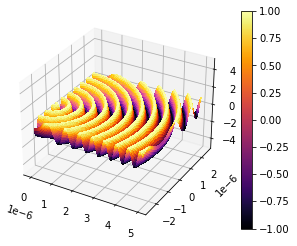

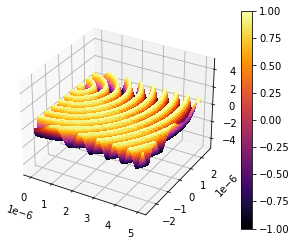

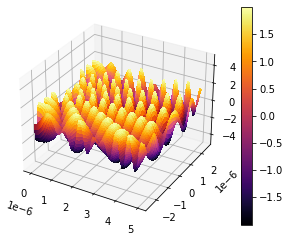

In [2]:
# Takes in x, y values and wave parameters, then returns z values for those points
def getWaveValues(x_vals, y_vals, source_x, source_y, wavelength, t):
    # Expects SI units; wavelength and position in meters, time in seconds
    # TODO
    delta_x = abs(source_x - x_vals)
    delta_y = abs(source_y - y_vals)
    radius = np.sqrt( ( (delta_x)*(delta_x) ) + ( (delta_y)*(delta_y) ) )
    k_num = (2 * np.pi) / wavelength
    omega = k_num * speed_of_light
    
    return np.sin( (k_num * radius) - (omega * t) )

# Takes x, y, z values and draws a 3-dimensional plot
def draw3DWave(x_vals, y_vals, z_vals):
    
    # There is a lot of junk you have to include to get 3D plots to look OK -- I won't get into the details!
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    rgb = LightSource().shade(z_vals, cmap=plt.get_cmap('inferno'), vert_exag=0.1, blend_mode='soft')
    m = cm.ScalarMappable(cmap=cm.inferno)
    m.set_array(z_vals)
    plt.colorbar(m)
    
    # This is the actual plotting: it takes in our x, y, z values and the color stuff we did above.
    # Then there are a bunch of other options that make it look nicer -- I looked these up!
    surf = ax.plot_surface(x_vals, y_vals, z_vals, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
    ax.set_zlim(-5, 5)  # Making the z axis larger so it's easier to see the shape
    plt.show()


# Set parameters of the wave, including the location of the sources
wavelength = 500e-9 # Wavelength in meters (500 nm)
source_x = 0
source_y1 = -1e-6
source_y2 = 1e-6
t = 0

# Generate a set of x and y values, then get the values for your Electric field wave (E_vals) at each point
x_vals = np.linspace(0, 5e-6, 200)
y_vals = np.linspace(-2.5e-6, 2.5e-6, 200)
x_vals, y_vals = np.meshgrid(x_vals, y_vals) # This does something new! We need a z value for every possible combination of x and y, so this transforms our x and y values lists to actually be a 2D space of all combinations.
E_vals1 = getWaveValues(x_vals, y_vals, source_x, source_y1, wavelength, t)
E_vals2 = getWaveValues(x_vals, y_vals, source_x, source_y2, wavelength, t)

# Draw your generated waves
draw3DWave(x_vals, y_vals, E_vals1)
draw3DWave(x_vals, y_vals, E_vals2)
draw3DWave(x_vals, y_vals, (E_vals1 + E_vals2) )



If you've done everything right above, you should be able to see your interference pattern in your third plot -- no complex math required. You might also notice that it takes a while for all of these plots to render. It's much slower than past plots because of the 3D drawing. It's also hard to see some of the features of the 3D drawing because we're drawing it on the 2D plane of your computer. Without being able to rotate it around, we're missing a lot. 

In fact, we have all the information we need encoded in the color we've put into this plot (which is set to change values along with the values of the z axis). That alone can give us a plot that's easier to look at, and renders faster. Below I've defined a function called `drawColorWave()`, which will take in three lists of x, y, and z values and make a plot from them. It will plot in a 2D space representing position, with the z axis (color) at each position representing the magnitude of the electric field. That means you need to hand it each of those lists to make it work.

**Use the defined function to draw three plots again: the two waves, and the interference pattern from their combination.**

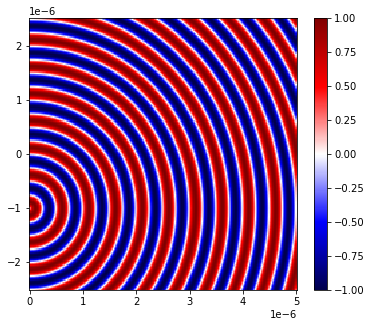

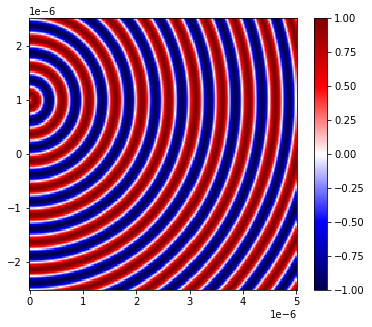

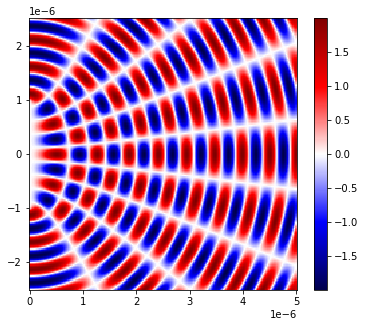

In [3]:
def drawColorWave(x_vals, y_vals, z_vals):
    fig, ax = plt.subplots(figsize=(6,5))
    c = ax.pcolormesh(x_vals, y_vals, z_vals, shading='auto', cmap='seismic',)
    fig.colorbar(c, ax=ax)
    plt.show()

# TODO: use the above function to draw the two waves defined in the previous cell, 
# as well as their interference pattern
drawColorWave(x_vals, y_vals, E_vals1)
drawColorWave(x_vals, y_vals, E_vals2)
drawColorWave(x_vals, y_vals, (E_vals1 + E_vals2) )

So now we have the same data, represented in a different way. In some ways its clearer what's going on (we can see the full 2D space very easily) and in some ways it's harder to understand (you have to think harder about the color scale to understand that the wave is going up and down as it goes from blue to red). When we try to plot 3D concepts on a 2D screen, we always have to make trade-offs in visualization. 

I changed the color scheme because for this plot, it's really helpful to have the 0 values show up as white -- it makes the positions of nodes much clearer. In general, we can pick from the many color schemes that matplotlib supplies. **Check out the [color schemes](https://matplotlib.org/stable/gallery/color/colormap_reference.html) that Matplotlib has to offer and choose one you like and that you think shows the data clearly. Update the plots with your chosen color scheme. What makes your color scheme a good choice?**

Since we made our wave function take in any time value, we're all set up to use our function to animate this interference. Below you'll find code that takes your `getWaveValues()` function, and changes the time t being handed to it to form an animation. As long as you defined everything correctly above, it should just run. It will take a minute though -- it has to generate 30 frames worth of plots!

In [4]:
%matplotlib inline
import matplotlib.animation as anim
from matplotlib import rc
rc('animation', html='jshtml')

def animateInterference(source_x, source_y1, source_y2, wavelength):
    
    # Set up our x and y values
    x_vals = np.linspace(0, 5e-6, 200)
    y_vals = np.linspace(-2.5e-6, 2.5e-6, 200)
    x_vals, y_vals = np.meshgrid(x_vals, y_vals)
    
    # Get our two waves
    E_vals1 = getWaveValues(x_vals, y_vals, source_x, source_y1, wavelength, 0)
    E_vals2 = getWaveValues(x_vals, y_vals, source_x, source_y2, wavelength, 0)
    z_vals = E_vals1+E_vals2

    # Make our figure
    fig, ax = plt.subplots(figsize=(6,5))
    c = ax.pcolormesh(x_vals, y_vals, z_vals, shading='auto', cmap='RdBu',)
    fig.colorbar(c, ax=ax)
    plt.close()
    
    # How to update our plot with different times
    def updatePlot(f):
        # Let's go through a full period. f goes from 0 to 30, and t should go from 0 to T
        T = wavelength/speed_of_light
        t = f*T/30
        new_E_vals1 = getWaveValues(x_vals, y_vals, source_x, source_y1, wavelength, t)
        new_E_vals2 = getWaveValues(x_vals, y_vals, source_x, source_y2, wavelength, t)
        z_vals = new_E_vals1+new_E_vals2
        c = ax.pcolormesh(x_vals, y_vals, z_vals, shading='auto', cmap='RdBu',)

    ani = anim.FuncAnimation(
                fig,            # This is the figure to be updated
                updatePlot,     # This is the function that defines how to update it
                frames = 30,     # This is the number of frames to generate (it will go from 0 to frames-1)
                interval = 30)  # This is the delay between frames (in ms)
    
    return ani
    
#animateInterference(source_x, source_y1, source_y2, wavelength)

How can we go from this 2D animation to a prediction of an interference pattern? An interference pattern is in principle a lot simpler to generate. We can begin by just picking an x value to put our screen at, and generate wave values for all the y values we care about at that x point. We can actually use the same `getWaveValues()` function you wrote before, but now you'll just hand it one x value instead of a list of them. Numpy makes the handling of single numbers vs. lists of numbers seamless.

Below you'll see a plot made of the electric field of each wave, plus the sum of the two waves along the screen. **Beneath that, you should add a plot of the intensity of the wave as a function of the y position on the screen.** We're using arbitrary units here (all values are just relative to the maximum value of the function) so you don't have to worry about any constants in this calculation. 

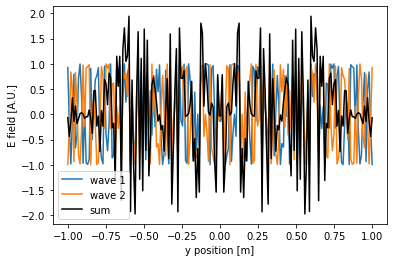

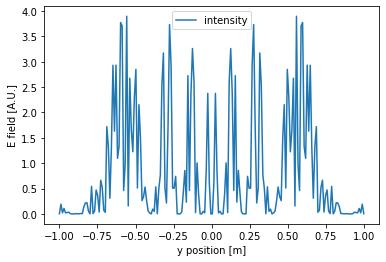

In [5]:
screen_x = 0.5  # 0.5 meters away
y_vals = np.linspace(-1, 1, 200)

# Define your two waves at the screen x and make plots of the E-field as a function of y at that x value
E_vals1 = getWaveValues(screen_x, y_vals, source_x, source_y1, wavelength, 0)
E_vals2 = getWaveValues(screen_x, y_vals, source_x, source_y2, wavelength, 0)
plt.plot(y_vals, E_vals1, label="wave 1")
plt.plot(y_vals, E_vals2, label="wave 2")
plt.plot(y_vals, E_vals1+E_vals2, label="sum", color="black")
plt.xlabel("y position [m]")
plt.ylabel("E field [A.U.]")
plt.legend()
plt.show()

# TODO: Draw the intensity hitting the screen at time t
# You can continue to use arbitrary units, so don't worry about overall constants that go into this conversion
# Don't forget to label your axes!
def square_it(a, b):
    return (a + b) * (a + b)
        
E_vals1 = getWaveValues(screen_x, y_vals, source_x, source_y1, wavelength, 0)
E_vals2 = getWaveValues(screen_x, y_vals, source_x, source_y2, wavelength, 0)
plt.plot(y_vals, square_it(E_vals1, E_vals2), label="intensity")
plt.xlabel("y position [m]")
plt.ylabel("E field [A.U.]")
plt.legend()
plt.show()

This doesn't look like an interference pattern! That's because we're just looking at one time t. To get the actual interference pattern we need to get the average value over a range of times. **Your turn: in the cell below, calculate and plot the average value of the intensity to reproduce the interference pattern.**

Some tips:
* The best way to get a consistent average is to n time steps in one period of the wave, where n is large.
* If you want to initialize a numpy array with n zeroes, you can use the `np.zeros(n)` function


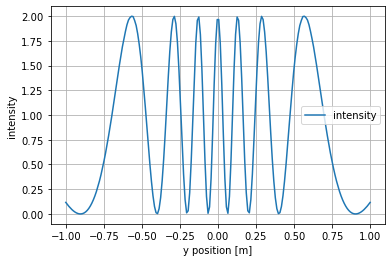

1.66782047599076e-15


In [6]:
# TODO: calculate and plot the interference pattern
n_vals = 500
# screen_x = 0.000001  # meters, for the final non-extra-credit question
# y_vals = np.linspace(-(2*screen_x), 2*screen_x, 200) # also for the final non-extra-credit question

T = (2*np.pi)/(((2 * np.pi) / wavelength) * speed_of_light)
time = np.linspace(0, T, n_vals)

intensity = np.zeros( len(y_vals) )

for i in time:
    E_vals1 = getWaveValues(screen_x, y_vals, source_x, source_y1, wavelength, i)
    E_vals2 = getWaveValues(screen_x, y_vals, source_x, source_y2, wavelength, i)
    intensity += ( (E_vals1 + E_vals2) * (E_vals1 + E_vals2) )/n_vals

plt.plot(y_vals, intensity, label="intensity")
plt.xlabel("y position [m]")
plt.ylabel("intensity")
plt.legend()
plt.grid()
plt.show()

print(T)


**Compare the function you produced to your expectations from double-slit interference. Does your generated plot match your expectations from the formula you've seen in class? Include some numeric description of what you did to check.**


In [7]:
y_1 = 0.125 #approximating from plot
print('y_1','is approximately',y_1,'m from the central maximum')
print('Wavelength =',wavelength,'m')
print('D =',screen_x,'m')

y_1 is approximately 0.125 m from the central maximum
Wavelength = 5e-07 m
D = 0.5 m


$$ y_m = \frac{m \lambda D}{d} $$

So, 

$$ d = \frac{m \lambda D}{y_m} $$

In [8]:
d_1 = (wavelength * screen_x)/y_1
print('m = 1, so d =',d_1,'m, which seems reasonable.')

m = 1, so d = 2e-06 m, which seems reasonable.


In [9]:
# Repeating with a couple other estimated values
y_2 = 0.289
y_3 = 0.313

d_2 = (2*wavelength * screen_x)/y_2
d_3 = (3*wavelength * screen_x)/y_3

print('d\tas calculated from\tm')
print(d_2,'\t\t2')
print(d_3,'\t\t3')

d	as calculated from	m
1.7301038062283738e-06 		2
2.3961661341853035e-06 		3


In [10]:
# And getting the standard deviation, just for funsies

N = 3
avg_d = (d_1 + d_2 + d_3)/N

sigma = np.sqrt( ( (d_1 - avg_d) * (d_1 - avg_d) ) + ( (d_2 - avg_d) * (d_2 - avg_d) ) + ( (d_3 - avg_d) * (d_3 - avg_d) ) / N )

print('std.dev =', sigma)

std.dev = 3.7536237614742877e-07


The values for d and the standard deviation between them all seem reasonable. I'm happy.

**What happens if you decrease the number of time points you consider? Why do you think this is happening?**

The edges of the plot get jagged (or fuzzy, depending on how long you stare at it) as the number of points decreases. This is due to a courser granularity in our attempt at an average.

**What happens if you change the distance to the screen to be much smaller, like a micrometer? Do the numbers still agree (make sure to decrease your y range appropriately)? What do you think is happening?**

As the distance between the slits and the screen decreases, the distance between fringes decreases proportionally. This is why the pattern still looks like a familiar interference pattern (despite the angles growing beyond SMA capabilities, which makes getting a good numerical check pretty improbable).

### _For a challenge..._

Here are some extensions to today's exercises that are beyond the scope of what's expected of you in this class. Give them a try if you'd like, or ignore this completely! Bonus points will be given for these tasks.

Make a plot that shows the intensity along a screen for three other scenarios:
1. Interference patterns for a variable number of infinitely small slits.
2. Diffraction patterns from one slit with a variable finite size. (Remember that you can do this with Huygen emitters, that look identical to the emitters we used already in this in-class. Keep in mind we're using 500nm wavelength.)
3. Interference plus diffraction patterns for two slits of variable finite size.
